# Hoja de Trabajo No.7 Parte 3 <br/> Mineria de Datos 2020
## Redes Neuronales y SVM
### Antonio Reyes 17273 <br/> Dieter de Wit 15146 <br/> Mineria de Datos 2020


# Continuación de HT - 7

## Predicción de la categoría de las casas medio de rangos de precios

In [1]:
# Importing the libraries
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
# Importar documento excel (Training Set)
datasetC = pd.read_csv('train.csv')
dataset = pd.read_csv('train.csv', na_values=['NA'])
dataset = dataset[['MSZoning','LotArea', 'Street', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterCond', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageArea', 'SaleCondition', 'SalePrice', 'Categoria']]

for x in range(0,dataset['SalePrice'].size):
    if dataset['SalePrice'][x] <= 200000:
        dataset['Categoria'][x] = int(0)
    if dataset['SalePrice'][x] > 200000 and dataset['SalePrice'][x] <= 400000:
        dataset['Categoria'][x] = int(1)
    if dataset['SalePrice'][x] > 400000 and dataset['SalePrice'][x] <= 600000:
        dataset['Categoria'][x] = int(2)
    if dataset['SalePrice'][x] > 600000 and dataset['SalePrice'][x] <= 800000:
        dataset['Categoria'][x] = int(3)
        
dataset

f:\python364bits\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

f:\python364bits\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

f:\python364bits\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

f:\python364bits\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a

,MSZoning,LotArea,Street,OverallCond,YearBuilt,YearRemodAdd,ExterCond,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageArea,SaleCondition,SalePrice,Categoria
0,RL,8450,Pave,5,2003,2003,TA,856,1710,2,Gd,8,548,Normal,208500,1.0
1,RL,9600,Pave,8,1976,1976,TA,1262,1262,2,TA,6,460,Normal,181500,0.0
2,RL,11250,Pave,5,2001,2002,TA,920,1786,2,Gd,6,608,Normal,223500,1.0
3,RL,9550,Pave,5,1915,1970,TA,756,1717,1,Gd,7,642,Abnorml,140000,0.0
4,RL,14260,Pave,5,2000,2000,TA,1145,2198,2,Gd,9,836,Normal,250000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Pave,5,1999,2000,TA,953,1647,2,TA,7,460,Normal,175000,0.0
1456,RL,13175,Pave,6,1978,1988,TA,1542,2073,2,TA,7,500,Normal,210000,1.0
1457,RL,9042,Pave,9,1941,2006,Gd,1152,2340,2,Gd,9,252,Normal,266500,1.0
1458,RL,9717,Pave,6,1950,1996,TA,1078,1078,1,Gd,5,240,Normal,142125,0.0


In [3]:
"""dataset = df.values
dataset"""

'dataset = df.values\ndataset'

In [4]:
X = dataset.iloc[:, [1,3,7,15]].values
Y = dataset.iloc[:, 15].values


In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [6]:
X_scale

array([[0.0334198 , 0.5       , 0.1400982 , 0.33333333],
       [0.03879502, 0.875     , 0.20654664, 0.        ],
       [0.04650728, 0.5       , 0.15057283, 0.33333333],
       ...,
       [0.03618687, 1.        , 0.18854337, 0.33333333],
       [0.03934189, 0.625     , 0.17643208, 0.        ],
       [0.04037019, 0.625     , 0.20556465, 0.        ]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.7)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [8]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(438, 4) (511, 4) (511, 4) (438,) (511,) (511,)


In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Using TensorFlow backend.


In [10]:
Dense(32, activation='relu', input_shape=(4,)),

(<keras.layers.core.Dense at 0x16d4cb53f88>,)

In [11]:
Dense(32, activation='relu'),
Dense(1, activation='sigmoid')

In [12]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
optimizer='sgd'

In [14]:
loss='binary_crossentropy'

In [15]:
metrics=['accuracy']

In [16]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 438 samples, validate on 511 samples
Epoch 1/100
438/438 [==============================] - 0s 248us/step - loss: 0.7019 - accuracy: 0.2763 - val_loss: 0.6909 - val_accuracy: 0.5558
Epoch 2/100
438/438 [==============================] - 0s 71us/step - loss: 0.6843 - accuracy: 0.7055 - val_loss: 0.6768 - val_accuracy: 0.7123
Epoch 3/100
438/438 [==============================] - 0s 68us/step - loss: 0.6698 - accuracy: 0.7374 - val_loss: 0.6648 - val_accuracy: 0.7123
Epoch 4/100
438/438 [==============================] - 0s 71us/step - loss: 0.6573 - accuracy: 0.7374 - val_loss: 0.6541 - val_accuracy: 0.7123
Epoch 5/100
438/438 [==============================] - 0s 76us/step - loss: 0.6460 - accuracy: 0.7374 - val_loss: 0.6442 - val_accuracy: 0.7123
Epoch 6/100
438/438 [==============================] - 0s 77us/step - loss: 0.6355 - accuracy: 0.7374 - val_loss: 0.6353 - val_accuracy: 0.7123
Epoch 7/100
438/438 [==============================] - 0s 66us/step - loss: 0.6261 - accu

# Certeza

In [17]:
model.evaluate(X_test, Y_test)[1]

511/511 [==============================] - 0s 19us/step


0.9726027250289917

# Visualizar

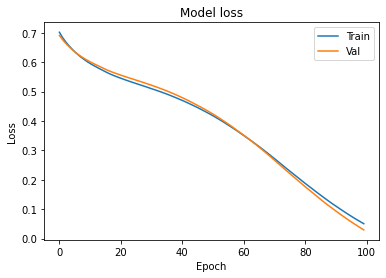

In [18]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

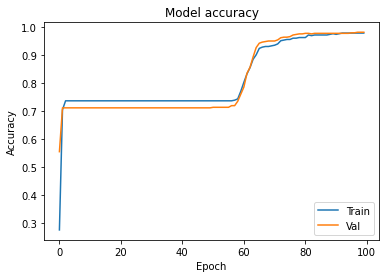

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization

In [21]:


model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(4,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))



Train on 438 samples, validate on 511 samples
Epoch 1/100
438/438 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.8904 - val_loss: -0.2881 - val_accuracy: 0.9843
Epoch 2/100
438/438 [==============================] - 1s 2ms/step - loss: -0.7841 - accuracy: 0.9817 - val_loss: -2.8991 - val_accuracy: 0.9726
Epoch 3/100
438/438 [==============================] - 1s 2ms/step - loss: -5.1531 - accuracy: 0.9772 - val_loss: -18.0901 - val_accuracy: 0.9863
Epoch 4/100
438/438 [==============================] - 1s 2ms/step - loss: -21.5456 - accuracy: 0.9406 - val_loss: -35.0013 - val_accuracy: 0.9804
Epoch 5/100
438/438 [==============================] - 1s 2ms/step - loss: -38.1127 - accuracy: 0.9840 - val_loss: -99.8028 - val_accuracy: 0.9843
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: -132.7149 - accuracy: 0.9680 - val_loss: -223.8945 - val_accuracy: 0.9843
Epoch 7/100
438/438 [==============================] - 1s 2ms/step - loss: -

438/438 [==============================] - 1s 2ms/step - loss: -181581028.5571 - accuracy: 0.9703 - val_loss: -240055093.2975 - val_accuracy: 0.9804
Epoch 54/100
438/438 [==============================] - 1s 2ms/step - loss: -203073988.9087 - accuracy: 0.9658 - val_loss: -264243806.1840 - val_accuracy: 0.9824
Epoch 55/100
438/438 [==============================] - 1s 2ms/step - loss: -224278613.3333 - accuracy: 0.9840 - val_loss: -287163653.8669 - val_accuracy: 0.9765
Epoch 56/100
438/438 [==============================] - 1s 2ms/step - loss: -243282940.3881 - accuracy: 0.9658 - val_loss: -318963569.2211 - val_accuracy: 0.9824
Epoch 57/100
438/438 [==============================] - 1s 2ms/step - loss: -272534050.4840 - accuracy: 0.9840 - val_loss: -342610752.2661 - val_accuracy: 0.9726
Epoch 58/100
438/438 [==============================] - 1s 2ms/step - loss: -296159379.6027 - accuracy: 0.9658 - val_loss: -379202115.8239 - val_accuracy: 0.9785
Epoch 59/100
438/438 [===================

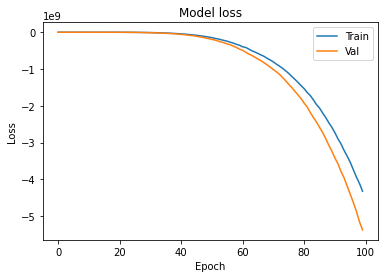

In [22]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

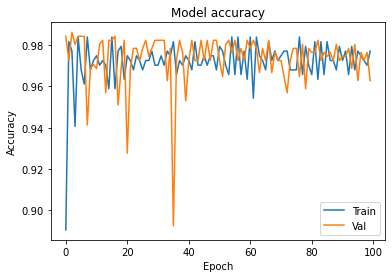

In [23]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(4,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [26]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 438 samples, validate on 511 samples
Epoch 1/100
438/438 [==============================] - 1s 3ms/step - loss: 21.9773 - accuracy: 0.7237 - val_loss: 13.4208 - val_accuracy: 0.7123
Epoch 2/100
438/438 [==============================] - 1s 2ms/step - loss: 8.9736 - accuracy: 0.7466 - val_loss: 4.9255 - val_accuracy: 0.9472
Epoch 3/100
438/438 [==============================] - 1s 3ms/step - loss: 3.1379 - accuracy: 0.9726 - val_loss: 1.5780 - val_accuracy: 0.9863
Epoch 4/100
438/438 [==============================] - 1s 2ms/step - loss: 0.9238 - accuracy: 0.9840 - val_loss: 0.4068 - val_accuracy: 0.9843
Epoch 5/100
438/438 [==============================] - 1s 2ms/step - loss: 0.1056 - accuracy: 0.9840 - val_loss: -0.5204 - val_accuracy: 0.9804
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: -1.4790 - accuracy: 0.9749 - val_loss: -6.0932 - val_accuracy: 0.9804
Epoch 7/100
438/438 [==============================] - 1s 2ms/step - loss: -12.4570 - accur

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()